# First Task

T and set of stations D

Entry: set of requests R (d1, d2, t1, t2)

Output: stair S in R maximizing the clique

### Tasks

1) générer le set R de requests

2) plot les rectangles

3) résoudre le clique

4) afficher le stair

In [1]:
# Time limit
T = 20

# Stations number
D = 10

# Requests number
R = 10

# Generate random Requests

In [2]:
from random import seed
from random import randint

# seed random number generator
seed(1)

requests_list = []

for i in range(R):
    t1 = randint(0,T-1)
    t2 = randint(t1+1,T)
    d1 = randint(0,D-1)
    d2 = randint(d1+1,D)
    r = (d1,d2,t1,t2)
    requests_list.append(r)
print(requests_list)

[(4, 5, 4, 7), (7, 10, 15, 19), (1, 9, 12, 16), (6, 7, 0, 13), (3, 8, 14, 17), (0, 1, 3, 14), (0, 7, 0, 18), (0, 9, 6, 13), (7, 9, 7, 20), (5, 7, 17, 18)]


# Plot the rectangles

(év. les arrondir pour + de visibilité)

In [3]:
from pylab import *
import matplotlib.pyplot as plt
import matplotlib.patches as patches


# Create the window itself

fig, ax = plt.subplots(figsize=(10, 6))

xlim(0,10)
ylim(0,20)

# Create the rectangles "patchs"
for i in range(R):
    a = requests_list[i]
    rect = patches.Rectangle((a[0],a[2]),a[1]-a[0],a[3]-a[2], linewidth=1, edgecolor='r', facecolor='none')

# Add the rectangle to the Axes
    ax.add_patch(rect)
 
plt.show()

<Figure size 1000x600 with 1 Axes>

# Clique creation in the graph

r et s sont COMPATIBLES si r_left < s_left et r_bot < s_top

                    et si r_top > s_bot si s_left < r_right
                    
dans requests_list, ça donne (d1,d2,t1,t2) = (r_left, r_right, r_bot, r_top)

On stocke dans E les paires "compatibles"

In [4]:
# Les nodes sont dans V
V = requests_list
E = []

for i in range(R):
    for j in range(R-1-i):
        V1 = V[i]
        V2 = V[R-j-1]
        print(i,R-j-1)  # On les a bien tous
        print(V1,V2)
        
        # On regarde qui est le plus à gauche, on renomme si besoin
        if V1[0] > V2[0]:
            a = V2
            V2 = V1
            V1 = a
            print(V1,V2)
        if V1[2] < V2[3]:                    # 1) Si celui à droite est trop bas, NOT COMPATIBLE
            if V1[3] < V2[2]:                # 2) Si il est complètement plus haut, il faut checker si il est aussi assez à droite
                if V1[1] <= V2[0]:
                # Add V1V2 au graphe         # Donc, s'il est complètement au dessus il nous faut aussi V1[1] < V2[0]
                    E.append((i,R-j-1))
            elif V1[3] >= V2[2]:             # Si celui à droite n'est pas trop haut, on est bon de toute manière
                # Add V1V2 au graphe
                E.append((i,R-j-1))
        print(E)

0 9
(4, 5, 4, 7) (5, 7, 17, 18)
[(0, 9)]
0 8
(4, 5, 4, 7) (7, 9, 7, 20)
[(0, 9), (0, 8)]
0 7
(4, 5, 4, 7) (0, 9, 6, 13)
(0, 9, 6, 13) (4, 5, 4, 7)
[(0, 9), (0, 8), (0, 7)]
0 6
(4, 5, 4, 7) (0, 7, 0, 18)
(0, 7, 0, 18) (4, 5, 4, 7)
[(0, 9), (0, 8), (0, 7), (0, 6)]
0 5
(4, 5, 4, 7) (0, 1, 3, 14)
(0, 1, 3, 14) (4, 5, 4, 7)
[(0, 9), (0, 8), (0, 7), (0, 6), (0, 5)]
0 4
(4, 5, 4, 7) (3, 8, 14, 17)
(3, 8, 14, 17) (4, 5, 4, 7)
[(0, 9), (0, 8), (0, 7), (0, 6), (0, 5)]
0 3
(4, 5, 4, 7) (6, 7, 0, 13)
[(0, 9), (0, 8), (0, 7), (0, 6), (0, 5), (0, 3)]
0 2
(4, 5, 4, 7) (1, 9, 12, 16)
(1, 9, 12, 16) (4, 5, 4, 7)
[(0, 9), (0, 8), (0, 7), (0, 6), (0, 5), (0, 3)]
0 1
(4, 5, 4, 7) (7, 10, 15, 19)
[(0, 9), (0, 8), (0, 7), (0, 6), (0, 5), (0, 3), (0, 1)]
1 9
(7, 10, 15, 19) (5, 7, 17, 18)
(5, 7, 17, 18) (7, 10, 15, 19)
[(0, 9), (0, 8), (0, 7), (0, 6), (0, 5), (0, 3), (0, 1), (1, 9)]
1 8
(7, 10, 15, 19) (7, 9, 7, 20)
[(0, 9), (0, 8), (0, 7), (0, 6), (0, 5), (0, 3), (0, 1), (1, 9), (1, 8)]
1 7
(7, 10, 15, 19) 

In [5]:
print(V)
print(E)

[(4, 5, 4, 7), (7, 10, 15, 19), (1, 9, 12, 16), (6, 7, 0, 13), (3, 8, 14, 17), (0, 1, 3, 14), (0, 7, 0, 18), (0, 9, 6, 13), (7, 9, 7, 20), (5, 7, 17, 18)]
[(0, 9), (0, 8), (0, 7), (0, 6), (0, 5), (0, 3), (0, 1), (1, 9), (1, 8), (1, 6), (1, 5), (1, 4), (1, 3), (1, 2), (2, 8), (2, 7), (2, 6), (2, 5), (2, 4), (2, 3), (3, 8), (3, 7), (3, 6), (3, 5), (4, 9), (4, 8), (4, 6), (4, 5), (5, 9), (5, 8), (5, 7), (5, 6), (6, 9), (6, 8), (6, 7), (7, 8), (8, 9)]


# Crique Resolution

Avec Gurobi ?!

In [6]:
# CODE IDEA TO FIND MAX SIZE OF A CLIQUE
# Pas très utile, donne uniquement la taille du clique maximum...

##### MANQUE

#  garder le numéro des vertices en tête

# Python3 implementation of the approach 
MAX = R; 
n = 0; 
  
# Stores the vertices 
store = [0] * MAX; 
  
# Graph 
graph = [[0 for i in range(MAX)] for j in range(MAX)]; 
# Degree of the vertices 
d = [0] * MAX; 

# Function to check if the given set of 
# vertices in store array is a clique or not 
def is_clique(b): 
  
    # Run a loop for all set of edges 
    for i in range(1, b): 
        for j in range(i + 1, b): 
  
            # If any edge is missing 
            if (graph[store[i]][store[j]] == 0): 
                return False; 
      
    return True; 
  
# Function to find all the sizes 
# of maximal cliques 
def maxCliques(i, l): 
  
    # Maximal clique size 
    max_ = 0; 
  
    # Check if any vertices from i+1 
    # can be inserted 
    for j in range(i + 1, n + 1): 
  
        # Add the vertex to store 
        store[l] = j; 
  
        # If the graph is not a clique of size k then 
        # it cannot be a clique by adding another edge 
        if (is_clique(l + 1)): 
  
            # Update max 
            max_ = max(max_, l); 
  
            # Check if another edge can be added 
            max_ = max(max_, maxCliques(j, l + 1)); 
          
    return max_; 
      
# HERE WE ENTER OUR GRAPH WITH THE EDGES
if __name__ == '__main__': 
    edges = E; 
    size = len(edges); 
    n = R-1; 
  
    for i in range(size): 
        # On remplit la matrice
        graph[edges[i][0]][edges[i][1]] = 1; 
        graph[edges[i][1]][edges[i][0]] = 1; 
        d[edges[i][0]] += 1; 
        d[edges[i][1]] += 1; 
      
    print(maxCliques(0, 1));

6


# Création pour chaque i de son ensemble de rectangle compatibles
from gurobipy import *

try:
    # Create the model
    m = gp.Model("task_1")
    
    # Create variables
    x_0 = m.addVar(vtype=GRB.BINARY, name="x_0")
    x_1 = m.addVar(vtype=GRB.BINARY, name="x_1")
    x_2 = m.addVar(vtype=GRB.BINARY, name="x_2")
    x_3 = m.addVar(vtype=GRB.BINARY, name="x_3")
    x_4 = m.addVar(vtype=GRB.BINARY, name="x_4")

    x = m.addVars(liste, vtype=GRB.BINARY, name = "x")
    x = (x_0,x_1,x_2,x_3,x_4)

    print(E)
    for i in range(R):
        E_i = []
        for j in range(R):
            if (i,j) in E:
                E_i.append(j)
            if (j,i) in E:
                E_i.append(j)
        print(i,E_i)
        m.addConstr(quicksum(x[i,j] for j in E_i) <= 1)
finally:
    print("0ver")

In [7]:
from gurobipy import *
import gurobipy as gp

try:
    # Create the model
    m = gp.Model("task_1")
    
    # Create variables
    liste = range(R)
    x = m.addVars(liste, vtype=GRB.BINARY, name = "x")
    
    # Set objective
    m.setObjective(quicksum(x), GRB.MAXIMIZE)
    
    # Set constraints
    print(E)
    for i in range(R):
        E_i = []
        for j in range(R):
            if i != j and (i,j) not in E and (j,i) not in E:
                E_i.append(j)
        print(i,E_i)
        m.addConstrs((x[i] + x[k] <= 1 for k in E_i), name='')
    m.optimize()  
finally:
    
    print(x)

Academic license - for non-commercial use only - expires 2021-04-25
Using license file /Users/colin/gurobi.lic
[(0, 9), (0, 8), (0, 7), (0, 6), (0, 5), (0, 3), (0, 1), (1, 9), (1, 8), (1, 6), (1, 5), (1, 4), (1, 3), (1, 2), (2, 8), (2, 7), (2, 6), (2, 5), (2, 4), (2, 3), (3, 8), (3, 7), (3, 6), (3, 5), (4, 9), (4, 8), (4, 6), (4, 5), (5, 9), (5, 8), (5, 7), (5, 6), (6, 9), (6, 8), (6, 7), (7, 8), (8, 9)]
0 [2, 4]
1 [7]
2 [0, 9]
3 [4, 9]
4 [0, 3, 7]
5 []
6 []
7 [1, 4, 9]
8 []
9 [2, 3, 7]
Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 16 rows, 10 columns and 32 nonzeros
Model fingerprint: 0xa1ffaeeb
Variable types: 0 continuous, 10 integer (10 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 6.0000000
Presolve removed 11 rows and 5

In [8]:
# TOUT FAUX !!!!!!!
#5  1,2,3 
#10 1,2,4,7,8
#8 2,3,6,7
#7 2,3,6
#6 1,2,3
Z = (1,2,4,7,8)
#Z = (1,2,3)
#Z = (2,3,6,7)
#Z = (2,3,6)
#Z = (1,2,3,5)

In [9]:
Z = (0,1,3,5,6,8)

In [10]:
print(Z)

(0, 1, 3, 5, 6, 8)


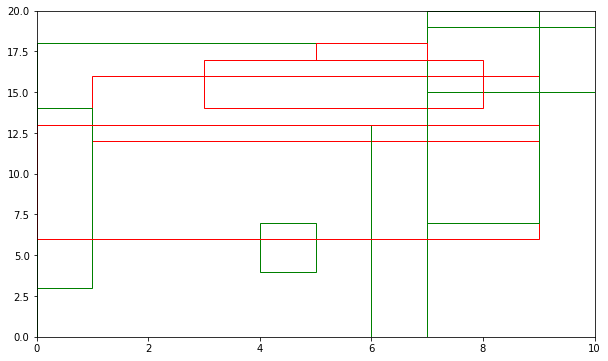

In [11]:
from pylab import *
import matplotlib.pyplot as plt
import matplotlib.patches as patches


# Create the window itself

fig, ax = plt.subplots(figsize=(10, 6))

xlim(0,10)
ylim(0,20)

# Create the rectangles "patchs"
for i in range(R):
    a = requests_list[i]
    if i in Z:
        rect = patches.Rectangle((a[0],a[2]),a[1]-a[0],a[3]-a[2], linewidth=1, edgecolor='g', facecolor='none')
    else:
        rect = patches.Rectangle((a[0],a[2]),a[1]-a[0],a[3]-a[2], linewidth=1, edgecolor='r', facecolor='none')
        
# Add the rectangle to the Axes
    ax.add_patch(rect)

plt.show()

[(4, 5, 4, 7), (7, 10, 15, 19), (6, 7, 0, 13), (0, 1, 3, 14), (0, 7, 0, 18), (7, 9, 7, 20)]


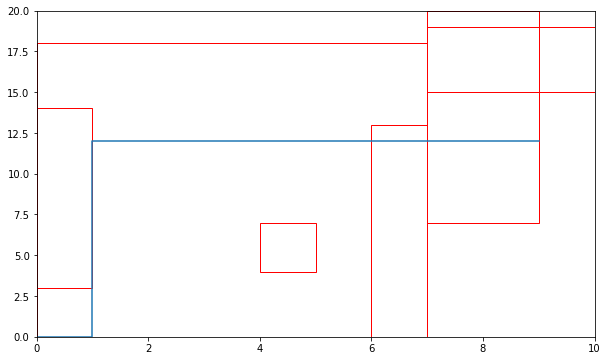

In [12]:
new_list = []
for i in range(R):
    a = requests_list[i]
    if i in Z:
        new_list.append(a)
print(new_list)


fig, ax = plt.subplots(figsize=(10, 6))
xlim(0,10)
ylim(0,20)

for i in range(len(new_list)):
    a = new_list[i]
    rect = patches.Rectangle((a[0],a[2]),a[1]-a[0],a[3]-a[2], linewidth=1, edgecolor='r', facecolor='none')
     
    ax.add_patch(rect)

# Add the stairs  
x = [0,1,6,7,9] 
y = [0, 0, 
     12,12,12]

plt.step(x, y)    

plt.show()

In [13]:
x = []
y = []
y.append(0)
ordre = sorted(new_list)
for i in range(len(ordre)):
    x.append(ordre[i][0])
    y.append(max(ordre[i][2], y[i]))
x.append(D)
print(x)
print(y)

[0, 0, 4, 6, 7, 7, 10]
[0, 3, 3, 4, 4, 7, 15]


[(4, 5, 4, 7), (7, 10, 15, 19), (6, 7, 0, 13), (0, 1, 3, 14), (0, 7, 0, 18), (7, 9, 7, 20)]
0
1
2
3
4
5
[0, 0, 4, 6, 7, 7, 10]
[0, 3, 3, 4, 4, 7, 15]


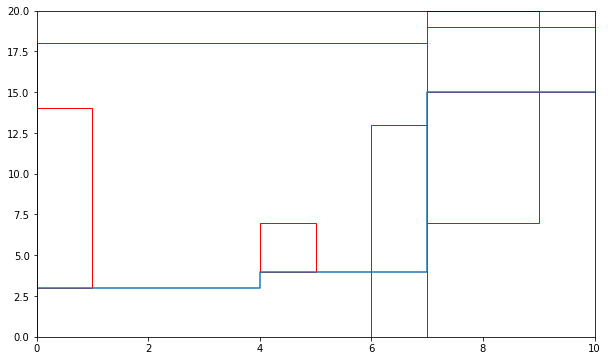

In [14]:
new_list = []
for i in range(R):
    a = requests_list[i]
    if i in Z:
        new_list.append(a)
print(new_list)


fig, ax = plt.subplots(figsize=(10, 6))
xlim(0,10)
ylim(0,20)

for i in range(len(new_list)):
    a = new_list[i]
    rect = patches.Rectangle((a[0],a[2]),a[1]-a[0],a[3]-a[2], linewidth=1, edgecolor='r', facecolor='none')
     
    ax.add_patch(rect)

# Add the stairs  
x = []
y = []
y.append(0)
ordre = sorted(new_list)
for i in range(len(ordre)):
    print(i)
    x.append(ordre[i][0])
    if i == 0:
        y.append(ordre[i][2])
    else:
        y.append(max(ordre[i][2], y[i]))
x.append(D)
print(x)
print(y)
plt.step(x, y)    

plt.show()